### PyTorch and Autograd Package

In [ ]:
# Here we will see how the Torch Autograd package works for automatic calculation of gradients

import torch
import numpy as np

In [3]:
x = torch.randn(3)
print(x)

tensor([0.5811, 0.5488, 0.4249])


In [15]:
x = torch.randn(3, requires_grad = True) # Now when we do computations PyTorch will calculate a computational graph for us
print(x)
y = x+2
print(y) # Notice the AddBackward - this shows that the gradients are calculated as part of the back propogation 
z = y * y * 2
print(z) # Notice MultBackward

z = z.mean()
print(z) # Notice MeanBackward

#Now we can call a PyTorch method called Backward to autocalculate the gradients (derivatives)

z.backward() # dz/dx
print(x.grad)

#Here we will be using a Jacobean matrix and rely on the "Chain Rule"

tensor([0.5684, 0.9082, 0.7586], requires_grad=True)
tensor([2.5684, 2.9082, 2.7586], grad_fn=<AddBackward0>)
tensor([13.1933, 16.9148, 15.2201], grad_fn=<MulBackward0>)
tensor(15.1094, grad_fn=<MeanBackward0>)
tensor([3.4245, 3.8775, 3.6782])


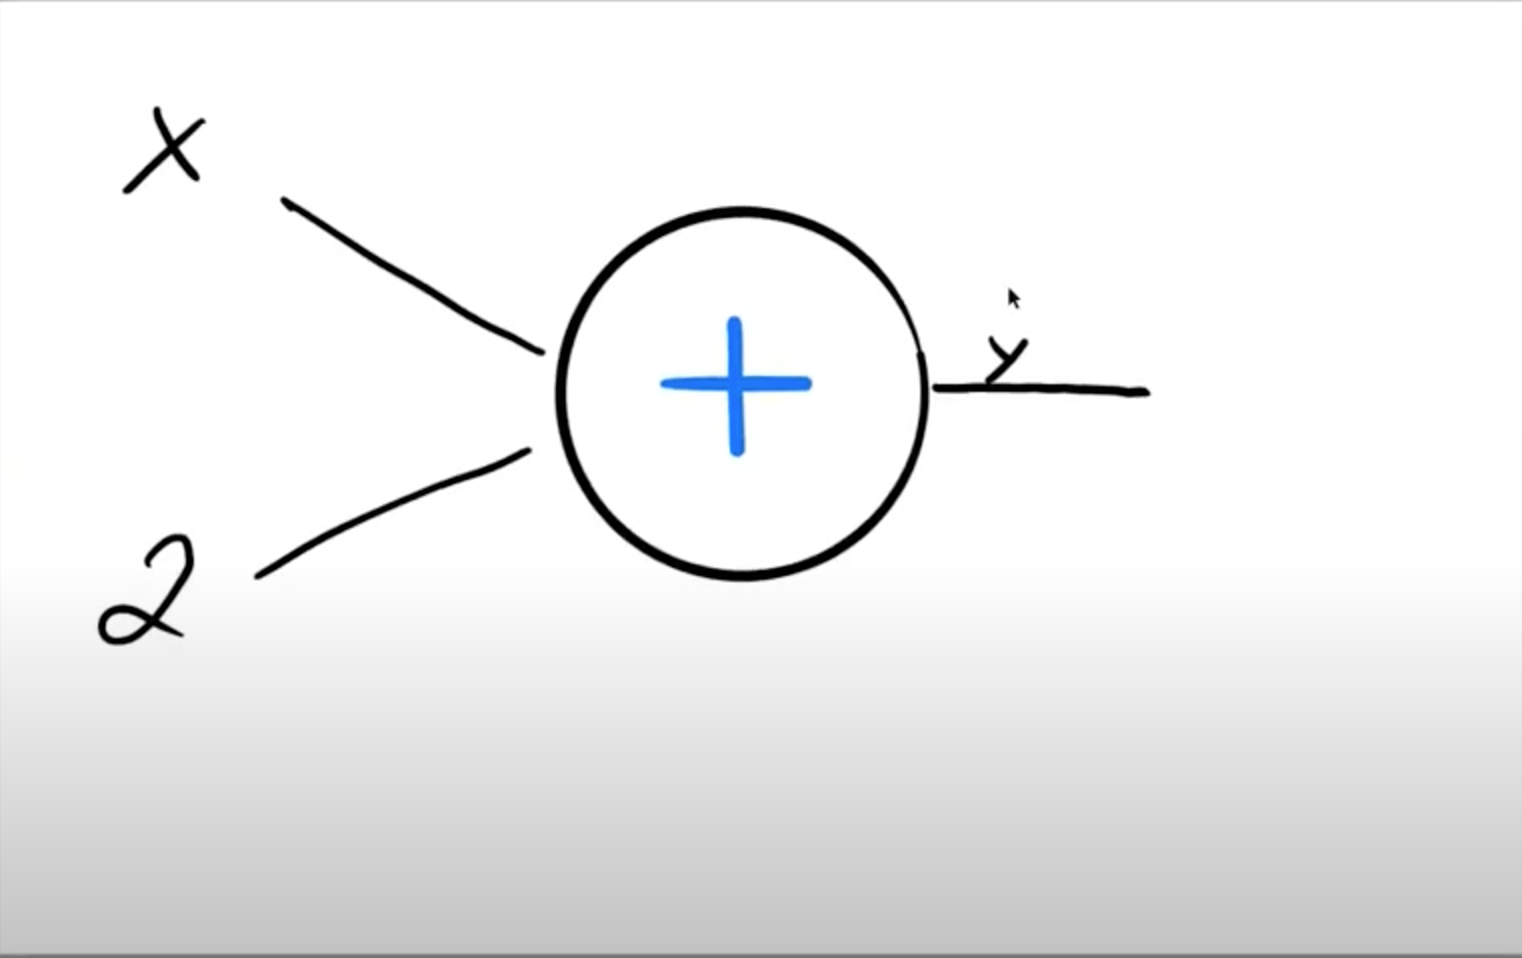

In [21]:
x = torch.randn(3, requires_grad = True) # Change to False
print(x)

y = x+2
print(y) # Notice the AddBackward - this shows that the gradients are calculated as part of the back propogation 

z = y * y * 2
print(z) # Notice MultBackward

#z = z.mean()
print(z) # Notice MeanBackward

#Now we can call a PyTorch method called Backward to autocalculate the gradients (derivatives)

v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)
z.backward(v) #If this is not a scalar we need to feed it the vector unlike above with scalar mean
print(x.grad)


tensor([ 2.0429, -0.6728,  0.9498], requires_grad=True)
tensor([4.0429, 1.3272, 2.9498], grad_fn=<AddBackward0>)
tensor([32.6899,  3.5227, 17.4022], grad_fn=<MulBackward0>)
tensor([32.6899,  3.5227, 17.4022], grad_fn=<MulBackward0>)
tensor([1.6172, 5.3086, 0.0118])


In [22]:
x = torch.randn(3, requires_grad = True)
print(x)

tensor([-0.7058, -0.8036,  0.1330], requires_grad=True)


In [29]:
#Three ways to not use the autograd function

# x.requires_grad_(False)
# x.detatch new tensor that doesnt require the gradient
# with torch.no_grad():
    
    
# Option 1

x.requires_grad_(False)
print(x) # No longer has the requires grad attribute


# Option 2

y = x.detach()
print(x)

# Option 3

with torch.no_grad():
    y = x + 2
    print(y)
    
# y = x + 2
# print(y)

#BE VERY CAREFUL AS THE GRADIENTS ARE ACCUMULATED THROUGH THE OPERATIONS
    

tensor([1.2942, 1.1964, 2.1330])


In [35]:
# Let's create a dummy training model

weights = torch.ones(4, requires_grad = True)

for epoch in range(10):
    model_output = (weights*3).sum()
    
    model_output.backward()
    
    print(weights.grad)


tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])
tensor([12., 12., 12., 12.])
tensor([15., 15., 15., 15.])
tensor([18., 18., 18., 18.])
tensor([21., 21., 21., 21.])
tensor([24., 24., 24., 24.])
tensor([27., 27., 27., 27.])
tensor([30., 30., 30., 30.])


In [34]:

weights = torch.ones(4, requires_grad = True)

for epoch in range(10):
    model_output = (weights*3).sum()
    
    model_output.backward()
    
    print(weights.grad)
    
    weights.grad.zero_() # This gets rid of the accumulated gradient calculations

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [40]:
# ## To recapitulate here are the main steps

# # Set the initial weight

# weights = torch.ones(4, requires_grad = True)

# # Run the automatic gradient calculation 

# z.backward()

# #Empty the gradient calculations 

# weights.grad.zero()
